In [129]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

# TRAIN

In [162]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [163]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
1,0.000000,115.24142,0.000,7.130074e-12,40.431974,0.000000,0,5,0.000000,NO
2,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,2,1.000000,UNKNOWN
3,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
4,0.538812,142.35385,1.530,1.667491e+01,5.765878,0.231184,0,0,0.037146,YES
...,...,...,...,...,...,...,...,...,...,...
95,2.227070,80.40987,2.055,2.127697e+01,4.710831,0.424818,0,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,YES
97,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000e+00,0.000000,0.000000,0,0,1.000000,NO


<Axes: title={'center': 'antonimos'}, xlabel='CLASS'>

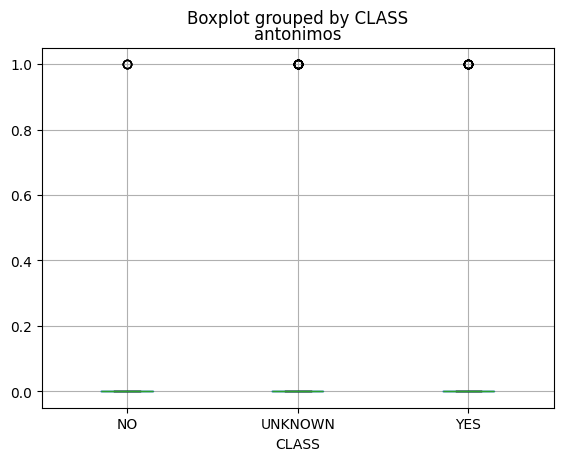

In [164]:
train.boxplot(by="CLASS",column="antonimos")

In [132]:
train=train.drop(["entropias","antonimos"],axis=1)
train

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0,1.000000,YES
1,0.000000,115.24142,7.130074e-12,40.431974,0.000000,5,0.000000,NO
2,0.000000,0.00000,0.000000e+00,0.000000,0.000000,2,1.000000,UNKNOWN
3,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0,1.000000,YES
4,0.538812,142.35385,1.667491e+01,5.765878,0.231184,0,0.037146,YES
...,...,...,...,...,...,...,...,...
95,2.227070,80.40987,2.127697e+01,4.710831,0.424818,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0,1.000000,YES
97,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0,1.000000,NO


In [133]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [134]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [135]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

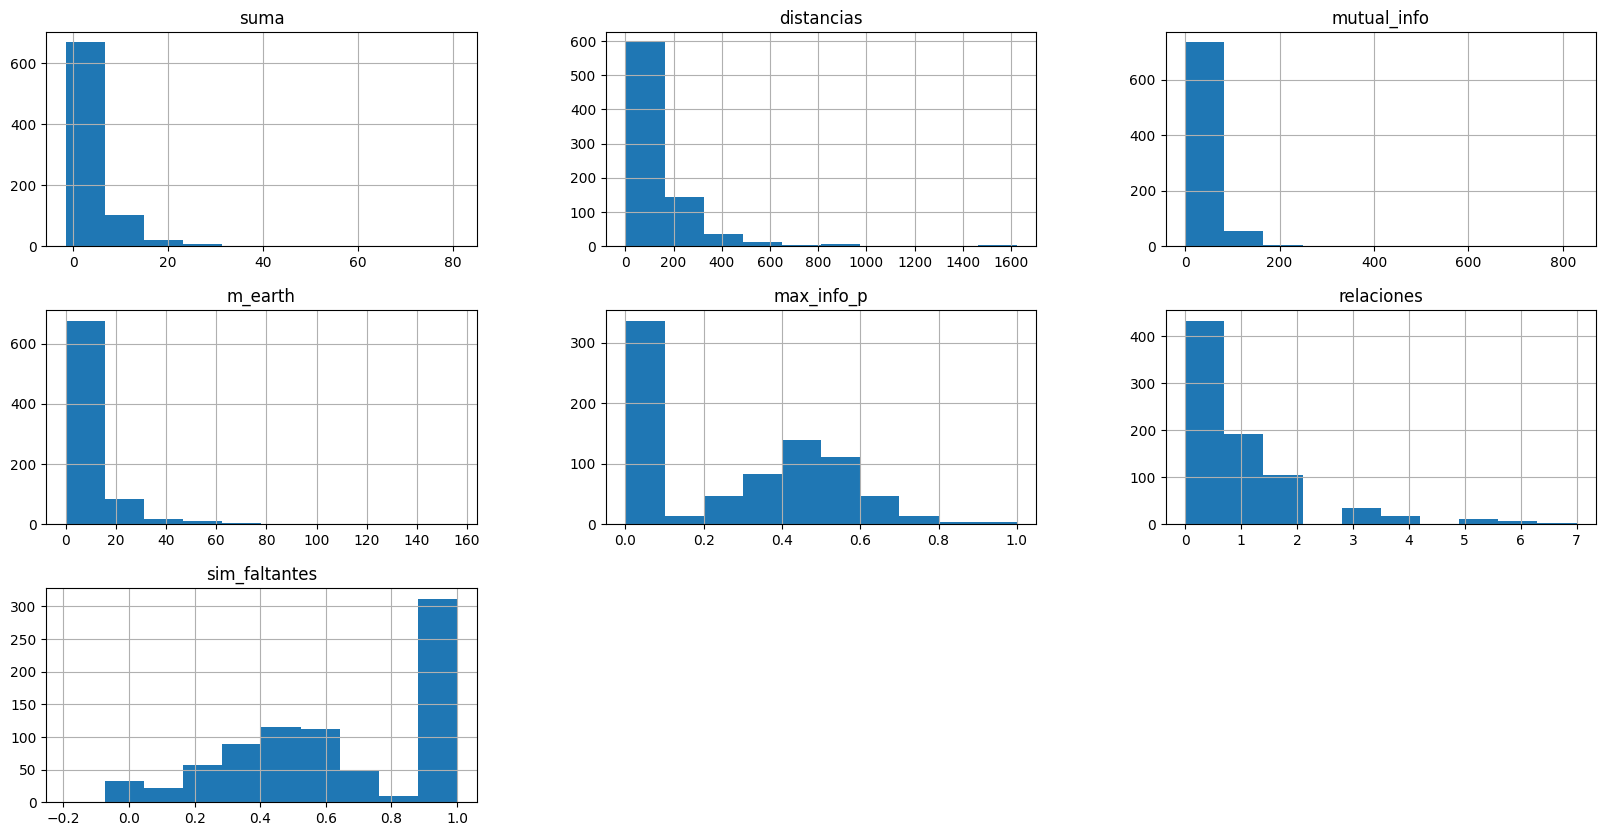

In [136]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [137]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/GHS/GHS_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/GHS/GHS_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [138]:
test=test.drop(["entropias","antonimos"],axis=1)
test

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,5.679739,79.98151,26.125275,4.323032,1.000000,1,0.661373,ENTAILMENT
1,25.331194,1055.37120,153.406431,24.355206,0.389737,4,0.742481,NONENTAILMENT
2,16.384842,845.79240,183.542110,37.086826,0.336778,3,0.474353,NONENTAILMENT
3,0.000000,0.00000,0.000000,0.000000,0.000000,0,1.000000,ENTAILMENT
4,12.049216,1389.58010,131.118867,77.395240,0.294243,4,0.474036,NONENTAILMENT
...,...,...,...,...,...,...,...,...
95,41.176525,2078.99200,383.745933,91.014366,0.363880,0,0.515552,NONENTAILMENT
96,8.346832,164.74274,63.822208,22.211134,0.415687,1,0.461147,ENTAILMENT
97,27.009216,2074.65770,373.729796,83.578557,0.368339,3,0.591632,NONENTAILMENT
98,17.902107,689.81537,163.529527,29.076957,0.454881,5,0.646072,NONENTAILMENT


In [139]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [140]:
# GHS
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [141]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [142]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [143]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [144]:
model.decision_function(X)

array([ 9.43808249e-01, -7.58236364e-01,  4.00486989e-01,  9.43808249e-01,
       -6.72220794e-02,  6.72147619e-01,  9.43808249e-01,  6.72147619e-01,
        1.69222805e-02, -1.37710830e+00,  6.72147619e-01,  9.43808249e-01,
        3.01228772e-01,  4.32440121e-01,  6.58529497e-01,  9.43808249e-01,
        4.00486989e-01,  2.62384008e-01,  8.47127024e-02,  3.07538783e-01,
       -1.07141780e-01,  6.72147619e-01,  6.72147619e-01,  6.72147619e-01,
       -9.19548467e-02,  4.00486989e-01,  6.72147619e-01, -1.47357219e-01,
        2.36813565e-02,  1.70898043e-01,  2.72149204e-01,  4.00486989e-01,
        2.34846903e-01,  2.51579096e-01,  6.72147619e-01,  6.72147619e-01,
        4.00486989e-01,  1.44494433e-01,  5.27396364e-02,  9.43808249e-01,
        9.43808249e-01,  8.89772031e-02, -1.50758706e-01,  2.87845696e-01,
        4.00486989e-01,  4.00486989e-01,  6.72147619e-01,  4.00486989e-01,
        9.43808249e-01,  6.72147619e-01, -3.62597029e-01,  1.70375713e-02,
       -6.58963756e-01,  

In [145]:
labels=train.columns[:-1]
labels

Index(['suma', 'distancias', 'mutual_info', 'm_earth', 'max_info_p',
       'relaciones', 'sim_faltantes'],
      dtype='object')

In [146]:
model.classes_

array([0, 1])

In [147]:
model.coef_[0]

array([ 0.03144597, -0.68496977, -0.22583299,  0.18450096, -0.06247202,
       -0.335751  ,  0.12832687])

In [148]:
coeficientes=model.coef_[0]

In [149]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  3 m_earth 1 distancias


In [150]:
n_columns=train.shape[1]-1

In [151]:
n_columns

7

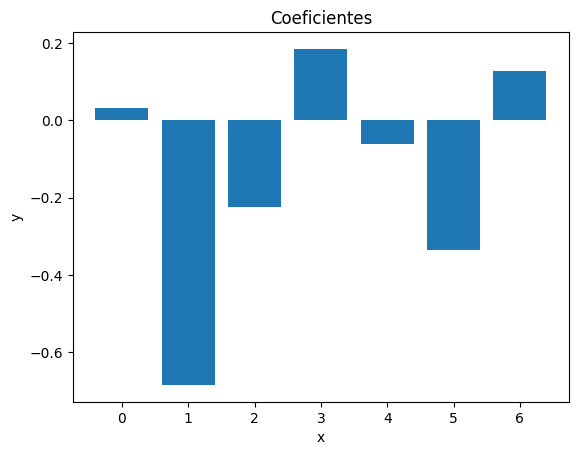

In [152]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [153]:
predictions = model.predict(X_test)

In [154]:
print(confusion_matrix(y_test, predictions))

[[326  75]
 [  7 392]]


In [155]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.9
precision:  0.84
recall 0.98
f1_score:  0.91
matthews_score:  0.81


In [156]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [157]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [158]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.780000 (0.063497)


In [159]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.870000 (0.041203)


In [160]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.820000 (0.036318)


In [161]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.620000 (0.071579)
